# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [43]:
import pandas as pd 
import numpy as np

In [44]:
data=pd.read_csv("data.tsv",sep='\\t')
data.head(5)

<ipython-input-44-77e8d697e872>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv("data.tsv",sep='\\t')


,"""ID",Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,"Response"""
0,"""5524",1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,"1"""
1,"""2174",1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,"0"""
2,"""4141",1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,"0"""
3,"""6182",1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,"0"""
4,"""5324",1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,"0"""


In [45]:
""" In this code block. I sprit the (") chars from left and right. """
data["ID"]=data["\"ID"].str.strip("\"")
data["Response"]=data["Response\""].str.strip("\"")
data.drop(["\"ID","Response\""],axis=1,inplace=True)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,ID,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,5524,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,2174,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,4141,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,6182,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,5324,0


In [46]:
"I have redesigned the data to obtain like first data."
data = data[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Z_CostContact","Z_Revenue", 'Response']]
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [47]:
"""I printed all unique values of all columns. Then, I saw that Z_CostContact and Z_revenue columns have same number in all rows.
I will drop them.""" 
for i in data:
    print(i,data[i].unique())

ID ['5524' '2174' '4141' '6182' '5324' '7446' '965' '6177' '4855' '5899'
 '1994' '387' '2125' '8180' '2569' '2114' '9736' '4939' '6565' '2278'
 '9360' '5376' '1993' '4047' '1409' '7892' '2404' '5255' '9422' '1966'
 '6864' '3033' '5710' '7373' '8755' '10738' '4339' '10755' '8595' '2968'
 '8601' '503' '8430' '7281' '2139' '1371' '9909' '7286' '7244' '6566'
 '8614' '4114' '1331' '2225' '9381' '6260' '10383' '7437' '8557' '8375'
 '6853' '3076' '1012' '6518' '4137' '8082' '1386' '9369' '4477' '1357'
 '1402' '10629' '6312' '8132' '1050' '5846' '1859' '7503' '10401' '1618'
 '3332' '2261' '5346' '4119' '535' '5268' '273' '4452' '8504' '771' '8996'
 '9235' '5798' '11178' '2230' '7516' '7247' '11100' '4646' '3037' '1473'
 '1016' '4518' '9370' '8908' '8373' '7533' '2683' '3629' '10991' '5077'
 '7431' '3267' '999' '9215' '2286' '1592' '367' '5234' '9862' '9805'
 '6205' '8442' '7386' '7215' '1491' '11071' '3381' '8268' '11051' '8026'
 '433' '9597' '1295' '5290' '1685' '5342' '9579' '7660' '1461' '8

In [48]:
"""We can see there just 1 unique number in Z_CostContact and Z_revenue. I dropped these column."""
data.drop(["Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [49]:
""" 
There are 13 nAn values. This is so little. So, I can replace them with mean of the Income column. 
"""
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 13
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [50]:
""" I fixed nAn value issue. """
data.fillna(data.mean(),inplace=True)
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [51]:
"""
Now, i will replace string columns with categorical varibles.
"""
data["Education"].value_counts()

Graduation    504
PhD           225
Master        163
2n Cycle       90
Basic          18
Name: Education, dtype: int64

In [52]:
for i in range(len(data["Education"])):
    if(data.iloc[i,2]=="Basic"):
        data.iloc[i,2]=1
    elif(data.iloc[i,2]=="Graduation"):
        data.iloc[i,2]=2
    elif(data.iloc[i,2]=="2n Cycle"):
        data.iloc[i,2]=3
    elif(data.iloc[i,2]=="PhD"):
        data.iloc[i,2]=4
    elif(data.iloc[i,2]=="Master"):
        data.iloc[i,2]=5

In [53]:
"We can see that there are very few alone people so, i will concant it with single. I think they are similiar a little bit."
data["Marital_Status"].value_counts()

Married     373
Together    255
Single      222
Divorced    111
Widow        36
Alone         3
Name: Marital_Status, dtype: int64

In [54]:
for i in range(len(data["Marital_Status"])):
    if(data.iloc[i,3]=="Alone" or data.iloc[i,3]=="Single" ):
        data.iloc[i,3]=1
    elif(data.iloc[i,3]=="Together"):
        data.iloc[i,3]=2
    elif(data.iloc[i,3]=="Married"):
        data.iloc[i,3]=3
    elif(data.iloc[i,3]=="Divorced"):
        data.iloc[i,3]=4
    elif(data.iloc[i,3]=="Widow"):
        data.iloc[i,3]=5
        

In [55]:
data["Marital_Status"].value_counts()

3    373
2    255
1    225
4    111
5     36
Name: Marital_Status, dtype: int64

In [56]:
"The response was string, I convert it."
for i in range(len(data["Response"])):
    if(data.iloc[i,-1]=="1"):
        data.iloc[i,-1]=1
    elif(data.iloc[i,-1]=="0"):
        data.iloc[i,-1]=0
    

In [57]:
"I changed type of columns. "
data['Marital_Status'] = data['Marital_Status'].astype('int64')
data['Education'] = data['Education'].astype('int64')
data['Response'] = data['Response'].astype('int64')

In [58]:
"""Also, I dropped ID column. Because it is redundant. Also Dt_customer was affecting the data very bad. I had to drop this column."""
data.drop(["ID"],axis=1,inplace=True)
data.drop(["Dt_Customer"],axis=1,inplace=True)

C:\Users\Berat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


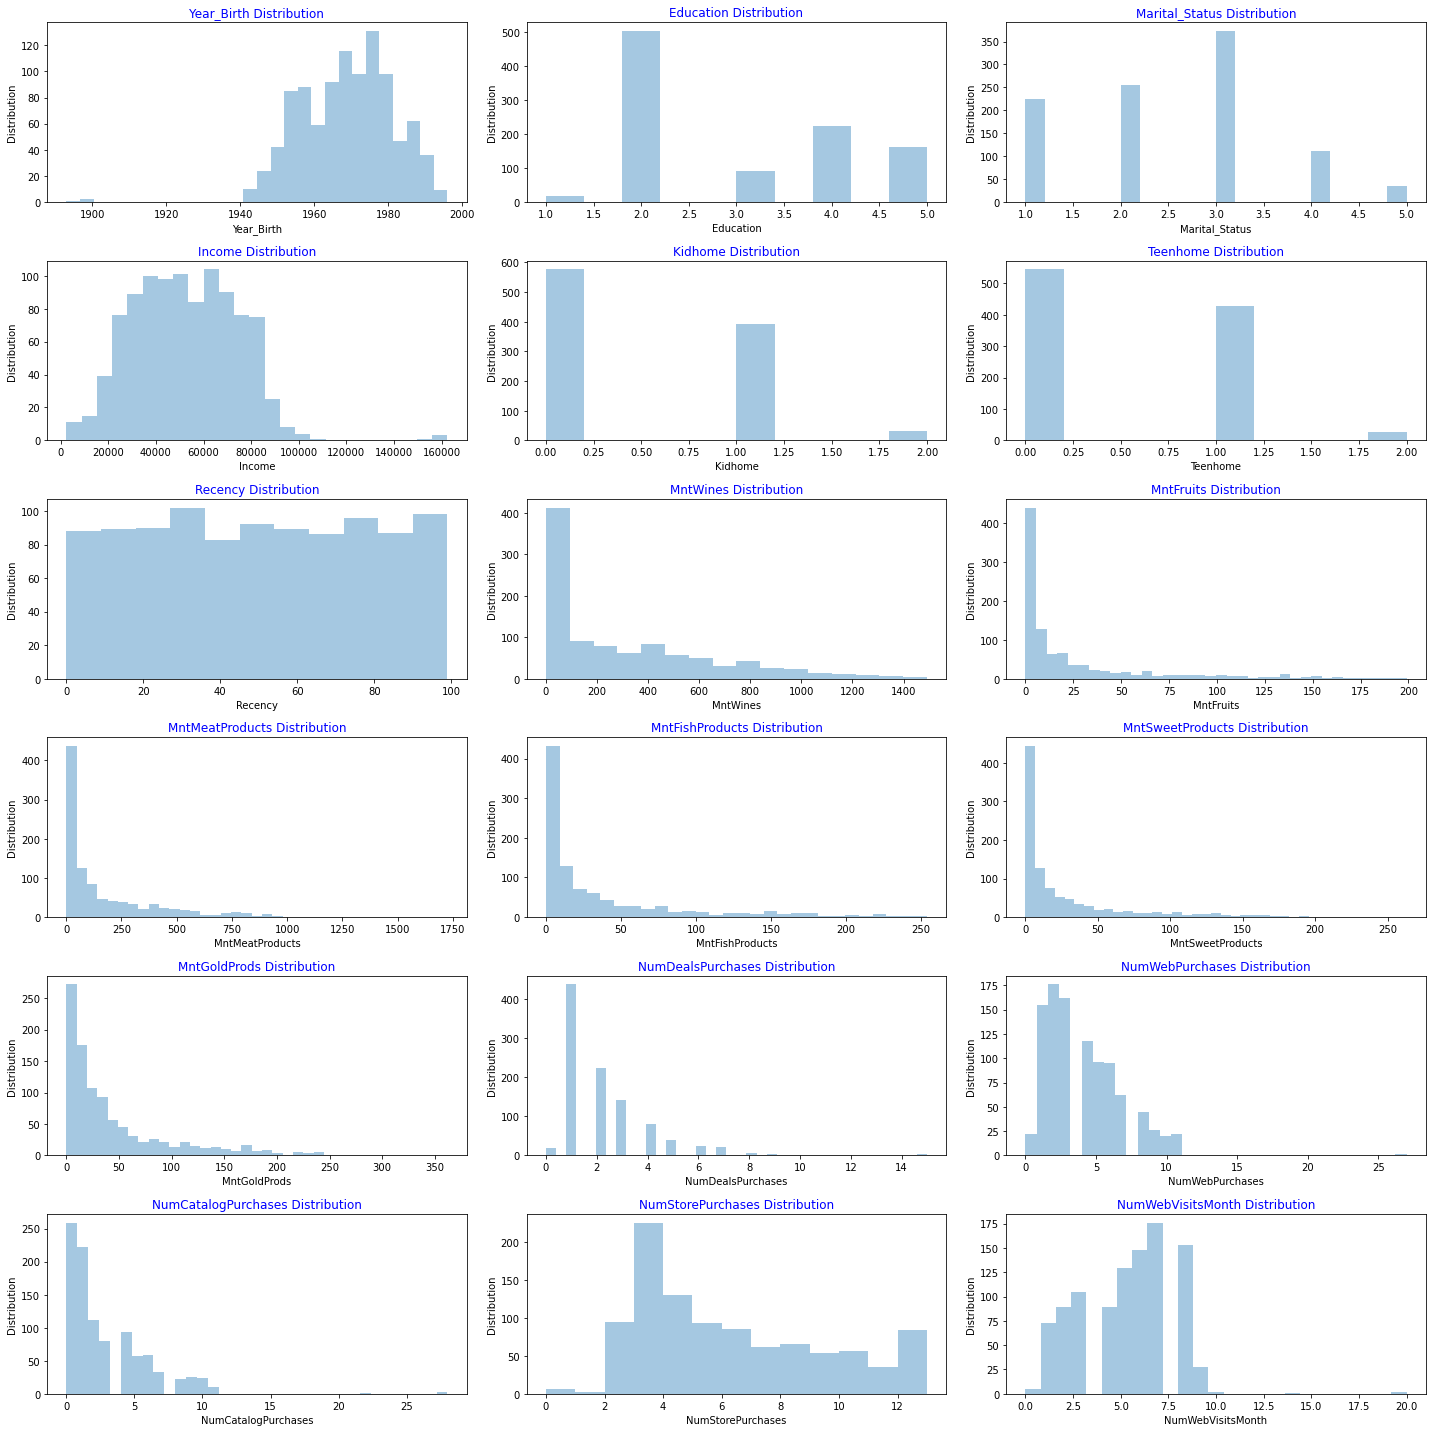

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns
""" I plot histogram chart of all columns. And I observed the distribution of the data. I made comments about it later. """
f=plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    if(i>17):
        break
    ax=f.add_subplot(6,3,i+1)
    sns.distplot(data[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

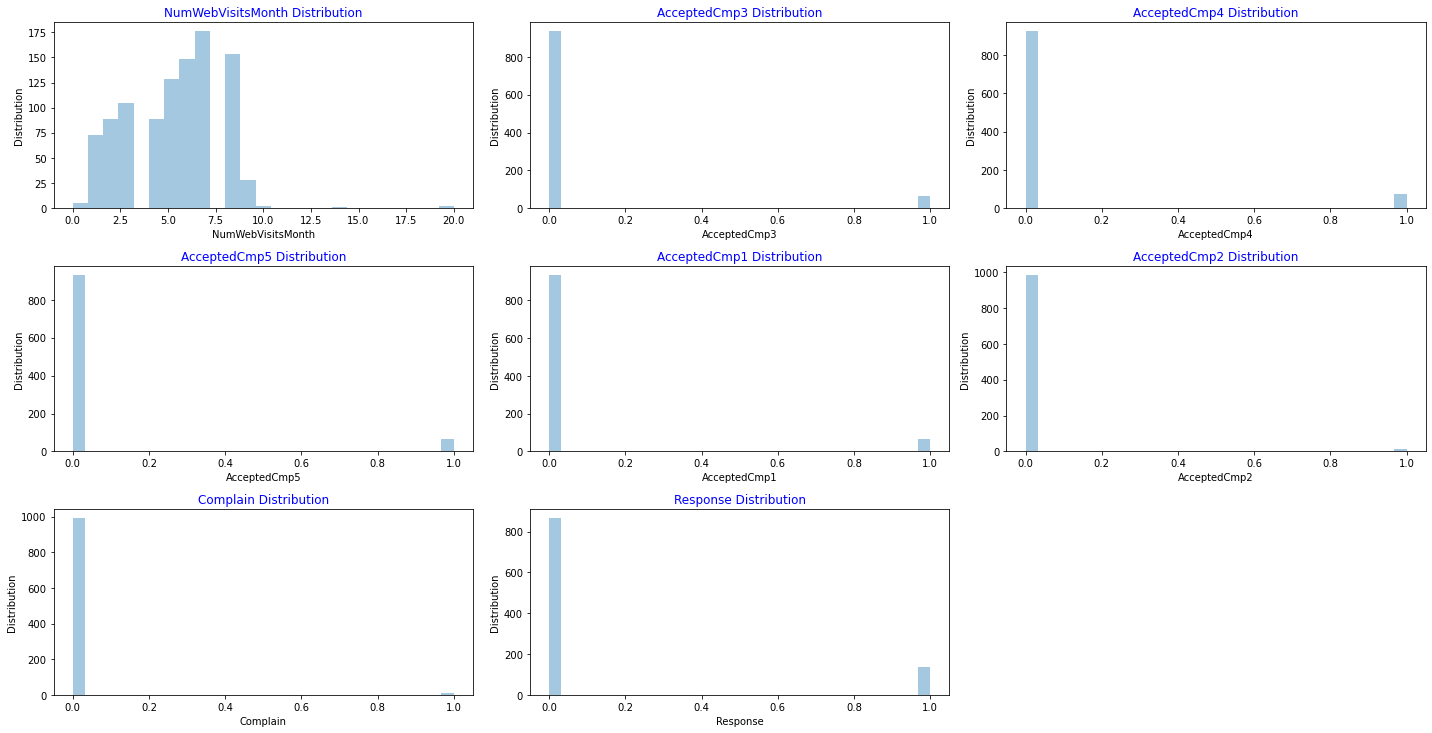

In [60]:
otherColumns=["NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response"]
f=plt.figure(figsize=(20,20))
for i, col in enumerate(otherColumns):
    ax=f.add_subplot(6,3,i+1)
    sns.distplot(data[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

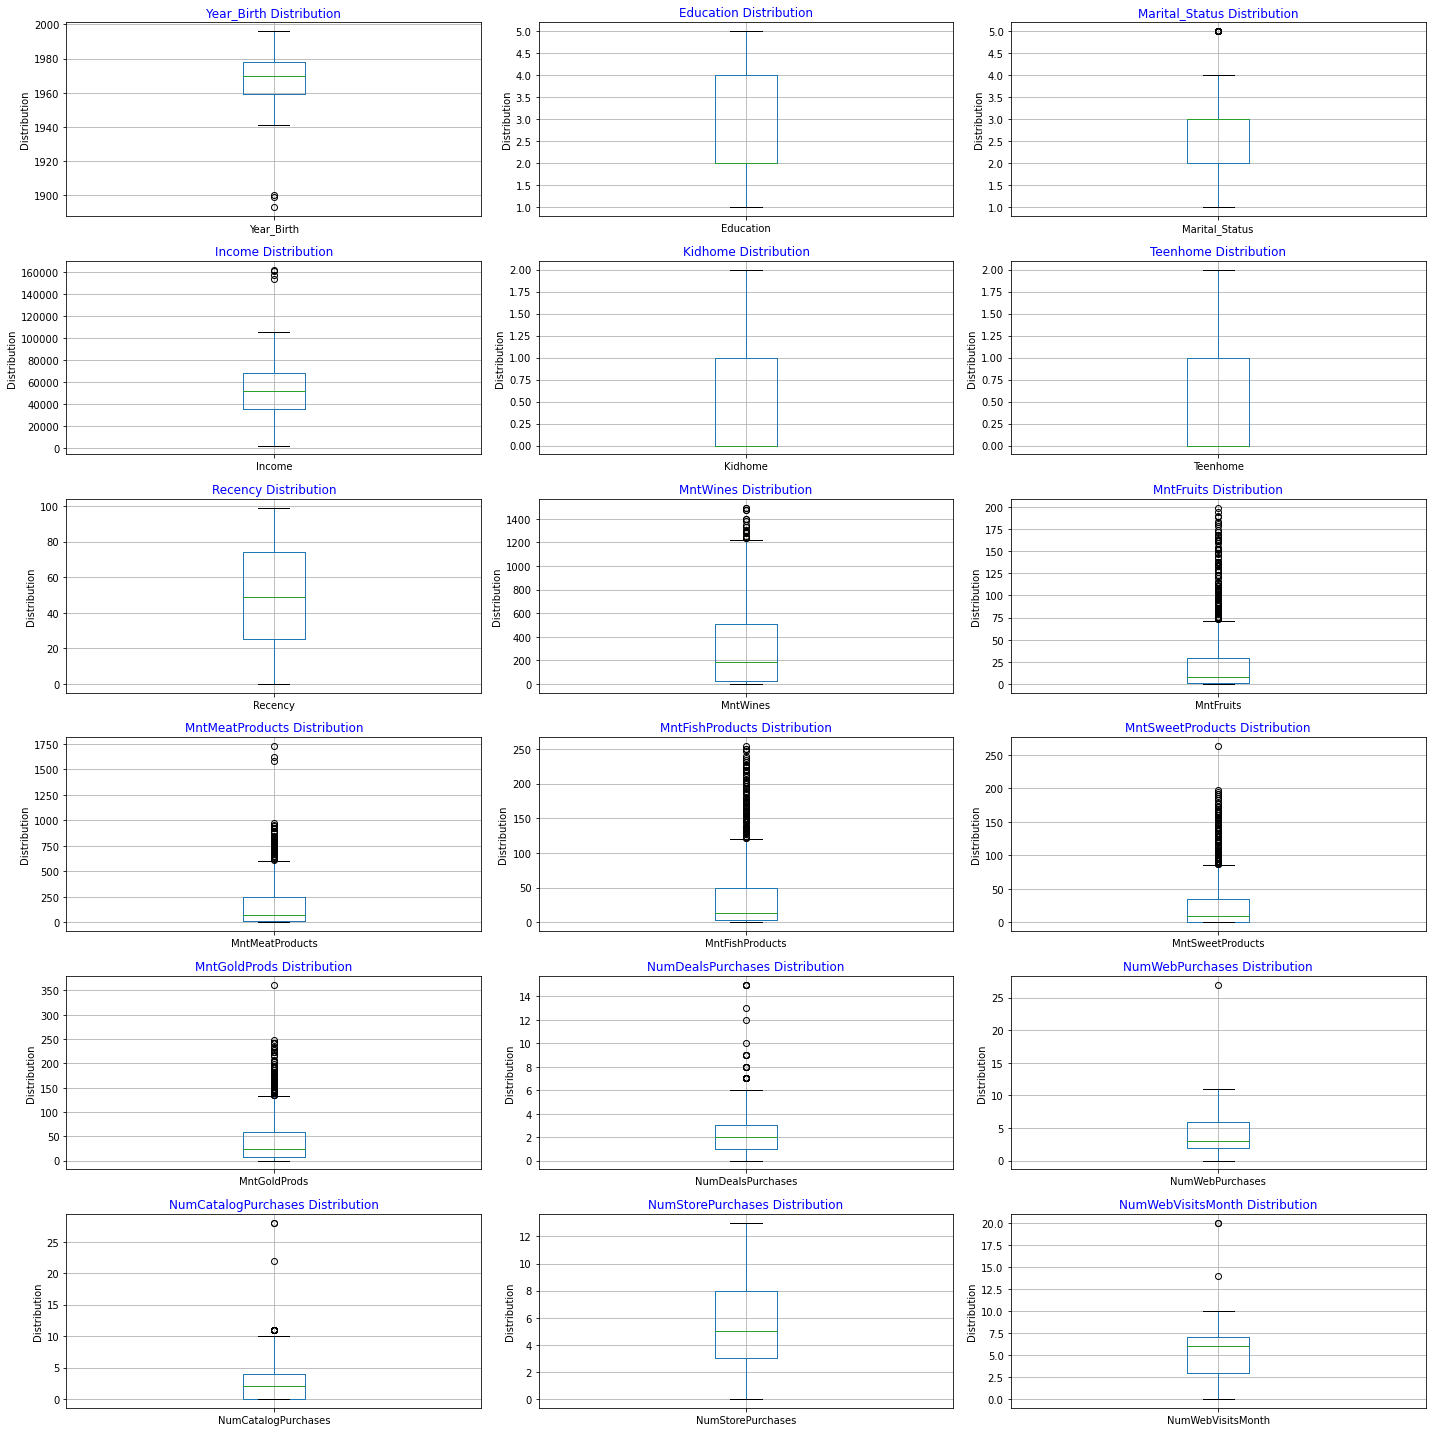

In [61]:
""" I plot box plot of all columns. And I observed the outliers of the data. I made comments about it later. """
f=plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    if(i>17):
        break
    ax=f.add_subplot(6,3,i+1)
    data.boxplot(column=col)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

In [62]:
#data.drop(["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"],axis=1,inplace=True)

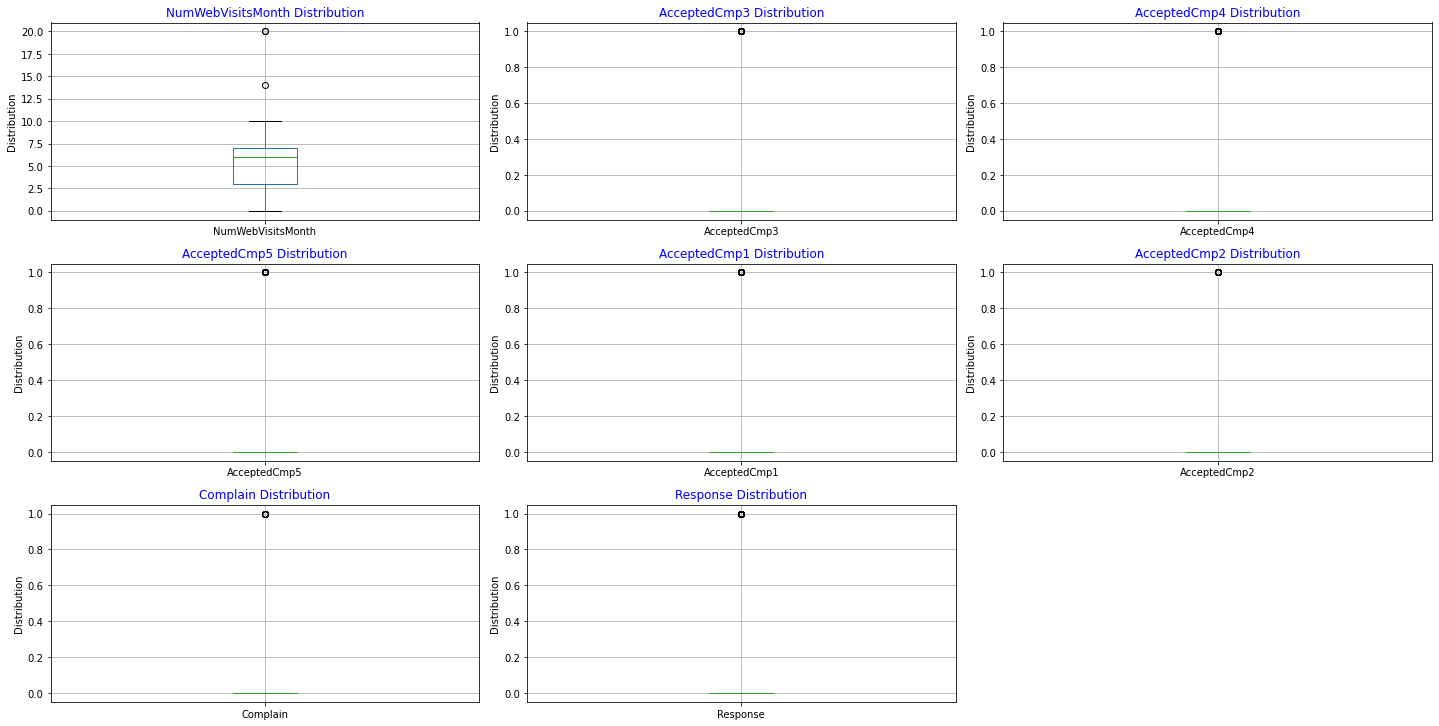

In [63]:
otherColumns=["NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response"]
f=plt.figure(figsize=(20,20))
for i, col in enumerate(otherColumns):
    ax=f.add_subplot(6,3,i+1)
    data.boxplot(column=col)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

In [64]:
print(data.shape)

(1000, 25)


In [65]:
"I created a outlier function but I didn't use it because when I dropped the outliers, the data was very corrupt. Then I decided not to drop them. "
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [66]:
#data=remove_outlier(data,"Year_Birth")
#data=remove_outlier(data,"Marital_Status")
#data=remove_outlier(data,"Income")
#data=remove_outlier(data,"Year_Birth")
#data=remove_outlier(data,"NumWebVisitsMonth")
#data=remove_outlier(data,"NumCatalogPurchases")
#data=remove_outlier(data,"NumDealsPurchases")

In [67]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [76]:
"I used MinMaxScaler for scaling. I tried to use StandardScaler but it didn't work as weel as MinMaxScaler."
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data)

In [77]:
sse=[]

In [78]:
"Then I plotted the Elbow graph from 1 to 20"
for k in range(1,20):
    km=KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

C:\Users\Berat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


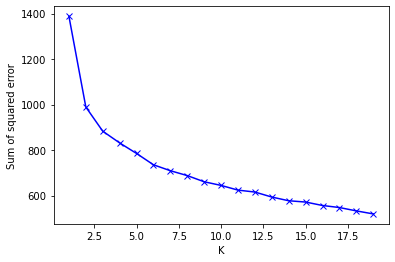

In [79]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(range(1,20),sse,"bx-")

In [81]:
"I reduced the data with PCA to visualize the data easily."
reduced_data = PCA(n_components=2).fit_transform(scaled_features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [82]:
"I think the optimal k is 2. I determined n_cluster as 2."
clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(scaled_features)

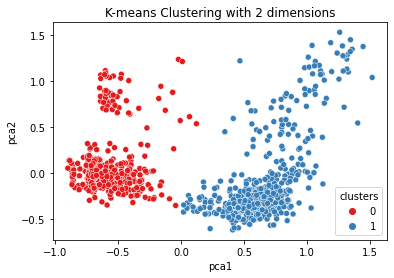

In [83]:
"Then I visulaize the clustring. I think It looks very good."
sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'],data=results,palette='Set1')
plt.title('K-means Clustering with 2 dimensions')
plt.show()

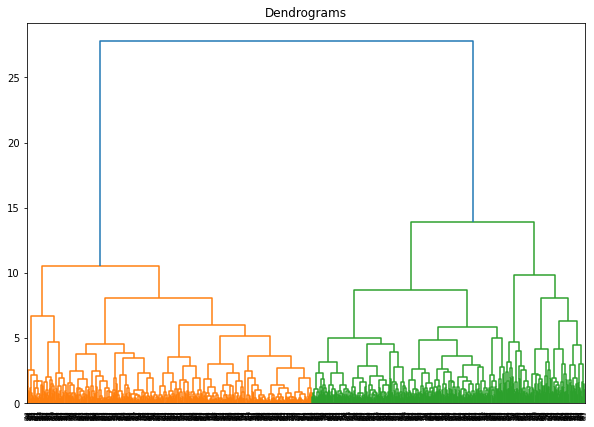

In [84]:
"This part about AgglomerativeClustring."
"I plot the dendrograms for linkages which are ward, single, complete, average."
"Then, I saw that ward linkage the best linkage for this data."
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))

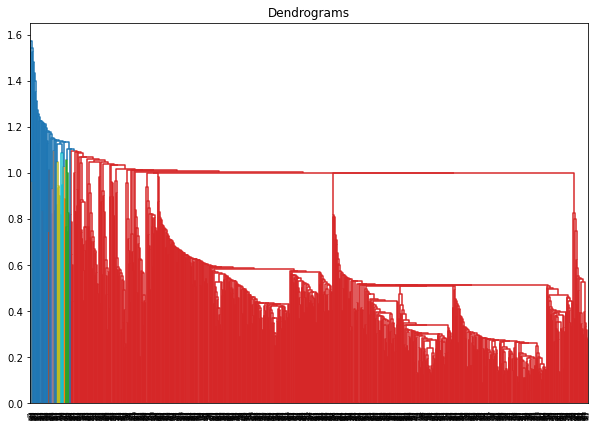

In [85]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='single'))

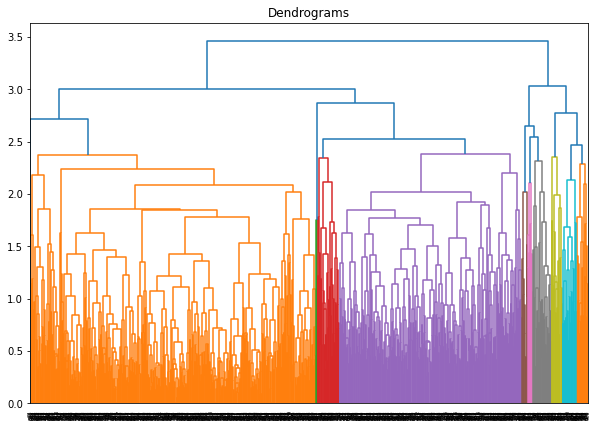

In [86]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='complete'))

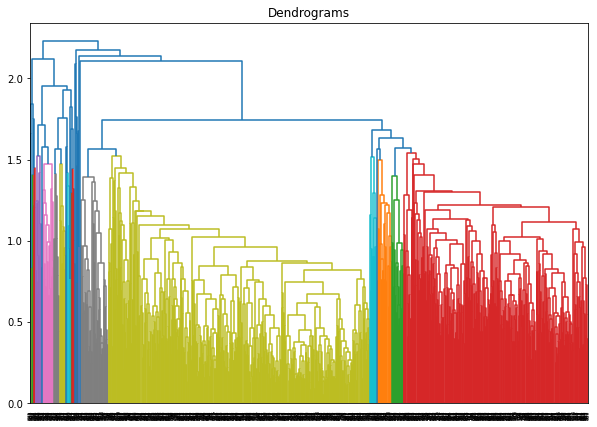

In [87]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='average'))

In [88]:
"Also, I created a function to visualaize with different n_clustres for each linkage."
def clust_plot(scaled_features,c,results):
    model=AgglomerativeClustering(linkage="single",n_clusters=c, affinity="euclidean")
    model=model.fit(scaled_features)
    ymin=model.labels_
    model=AgglomerativeClustering(linkage="complete",n_clusters=c, affinity="euclidean")
    model=model.fit(scaled_features)
    ymax=model.labels_
    model=AgglomerativeClustering(linkage="average",n_clusters=c, affinity="euclidean")
    model=model.fit(scaled_features)
    yavg=model.labels_
    model=AgglomerativeClustering(linkage="ward",n_clusters=c, affinity="euclidean")
    model=model.fit(scaled_features)
    yward=model.labels_
    
    sns.scatterplot(x="pca1", y="pca2", hue=ymin,data=results,palette='Set1')
    plt.title("Single with n_clusters={}".format(c))
    plt.show()
    sns.scatterplot(x="pca1", y="pca2", hue=ymax,data=results,palette='Set1')
    plt.title("complete with n_clusters={}".format(c))
    plt.show()
    sns.scatterplot(x="pca1", y="pca2", hue=yavg,data=results,palette='Set1')
    plt.title("average with n_clusters={}".format(c))
    plt.show()
    sns.scatterplot(x="pca1", y="pca2", hue=yward,data=results,palette='Set1')
    plt.title("ward with n_clusters={}".format(c))
    plt.show()

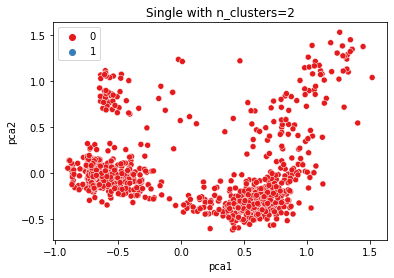

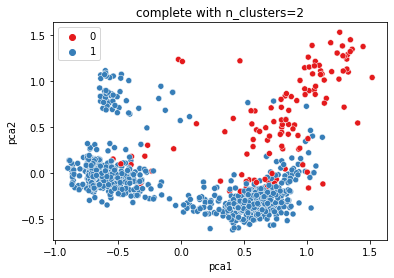

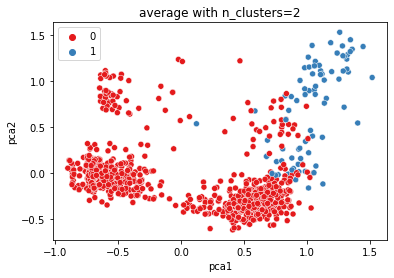

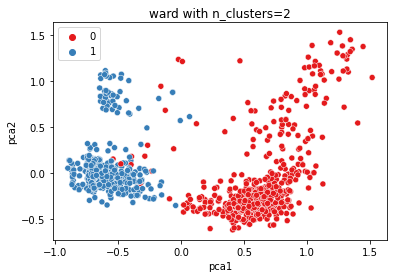

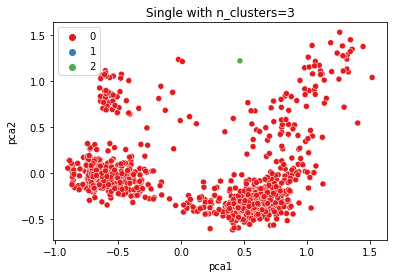

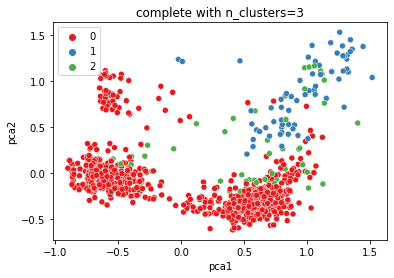

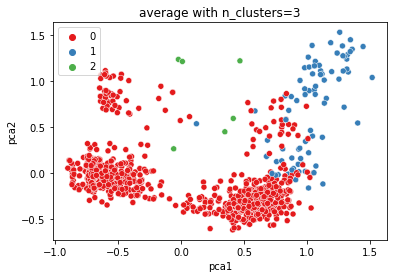

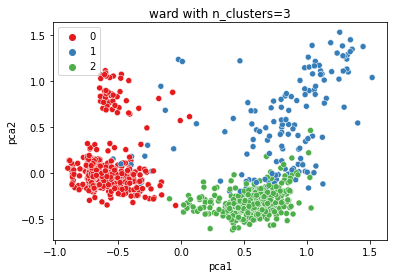

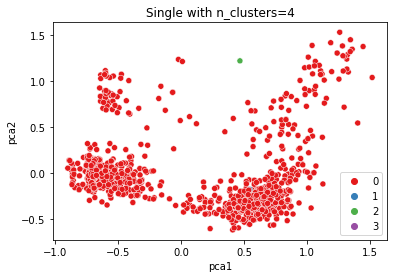

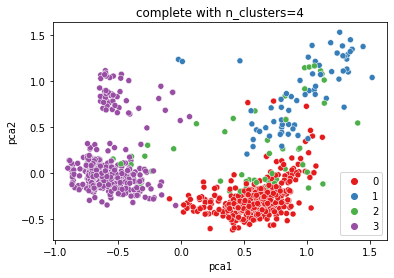

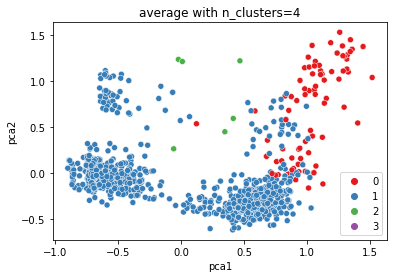

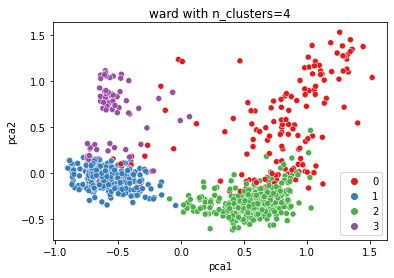

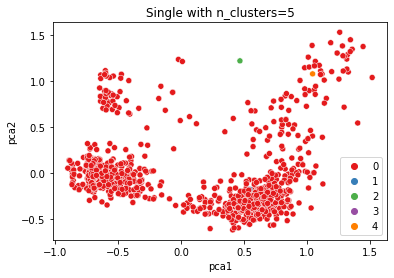

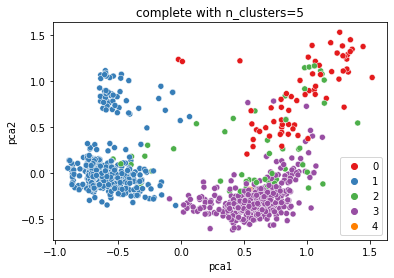

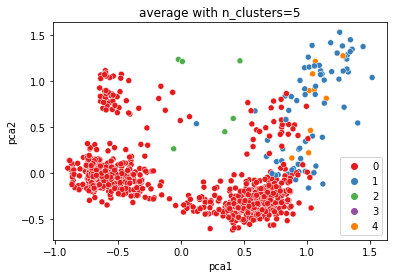

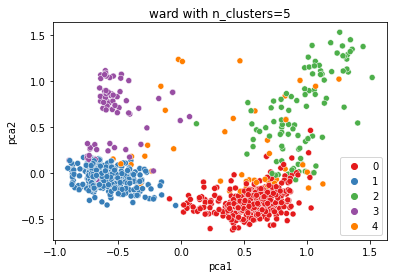

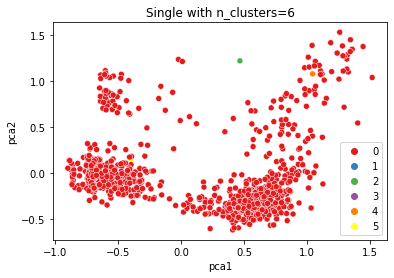

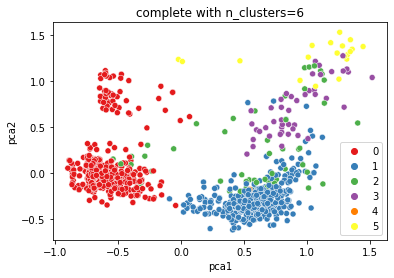

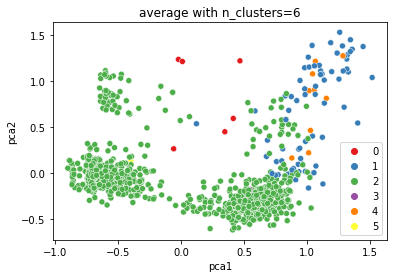

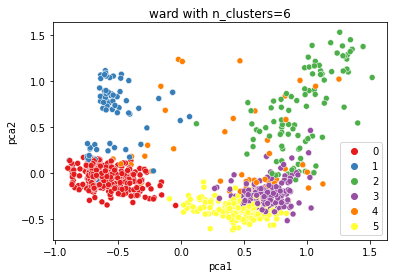

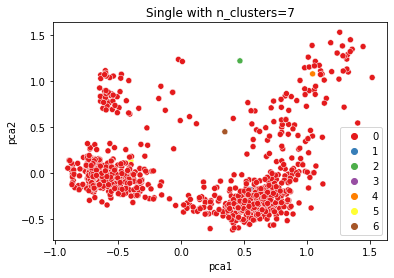

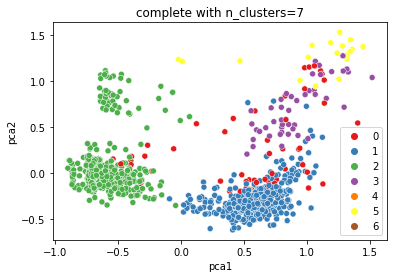

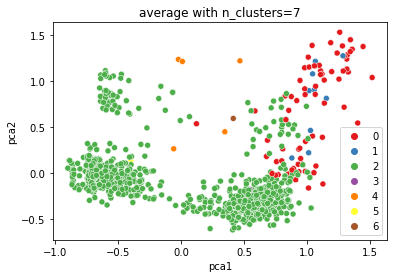

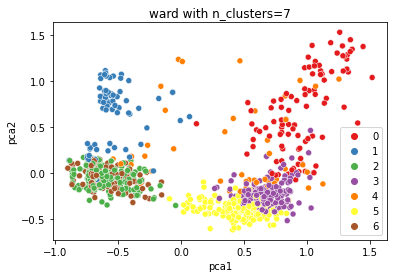

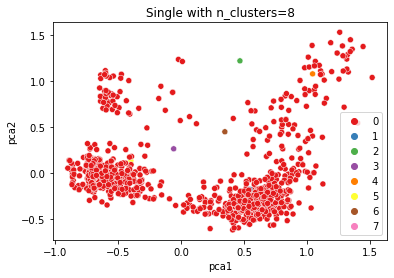

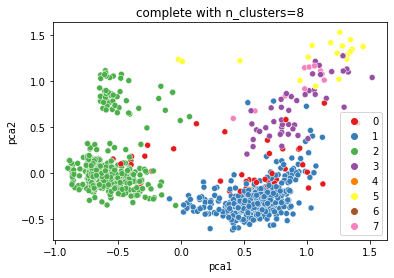

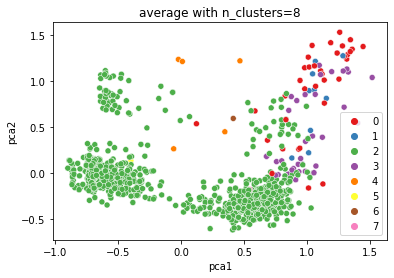

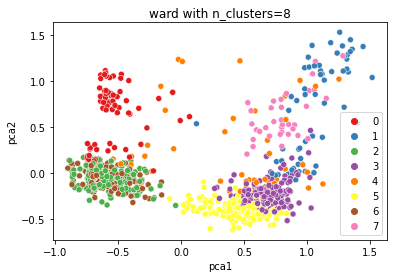

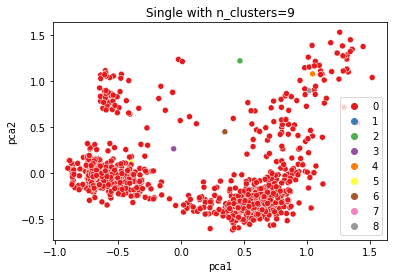

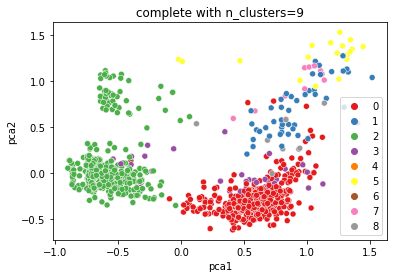

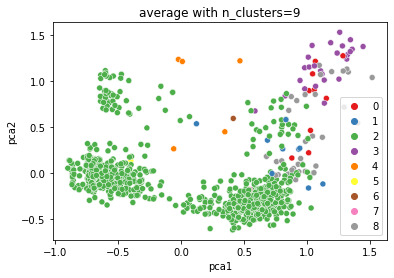

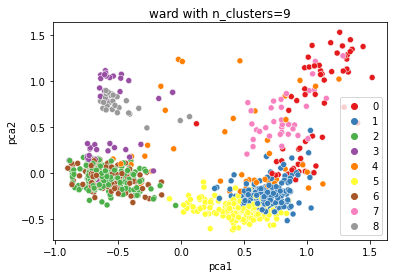

In [89]:
"By looking at these graphs, we can see again that \"ward\" is the best."
for i in range(2,10):
    clust_plot(scaled_features,i,results)

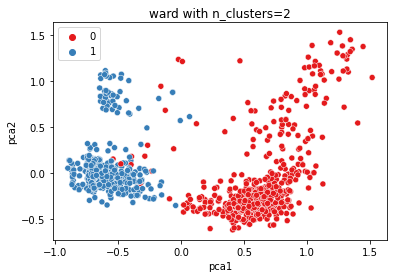

In [90]:
"Then, I plotted the ward graph to see again. It is not as good as K-mans clustering. But I think this is not so bad."
model=AgglomerativeClustering(linkage="ward",n_clusters=2)
model=model.fit(scaled_features)
yward=model.labels_
sns.scatterplot(x="pca1", y="pca2", hue=yward,data=results,palette='Set1')
plt.title("ward with n_clusters={}".format(2))
plt.show()

In [91]:
#Silhouette Coefficient
from sklearn.metrics import silhouette_score, silhouette_samples
"Then i print the silhouette scores for each n_clusters. And we can see that again when n_clusters is 2, the score is the best"
for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(scaled_features)
    centers = km.cluster_centers_

    score = silhouette_score(scaled_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2890618078717126
For n_clusters = 3, silhouette score is 0.2889027036831977
For n_clusters = 4, silhouette score is 0.2752947291322936
For n_clusters = 5, silhouette score is 0.14440858058143533
For n_clusters = 6, silhouette score is 0.1470095414297397
For n_clusters = 7, silhouette score is 0.1336989044180625
For n_clusters = 8, silhouette score is 0.1412231589481744
For n_clusters = 9, silhouette score is 0.14486518709711063
For n_clusters = 10, silhouette score is 0.13504835288675002
For n_clusters = 11, silhouette score is 0.12791163833582142
For n_clusters = 12, silhouette score is 0.12353504079424953
For n_clusters = 13, silhouette score is 0.12081163107340391
For n_clusters = 14, silhouette score is 0.11289295661224588
For n_clusters = 15, silhouette score is 0.1270832640792794
For n_clusters = 16, silhouette score is 0.11332850344962397
For n_clusters = 17, silhouette score is 0.13373630235441256
For n_clusters = 18, silhouette score i

In [92]:
scores=[]
"Then i print the silhouette scores for each n_clusters. And we can see that again when n_clusters is 2, the score is the best"
for n_clusters in range(2,21):
    model = AgglomerativeClustering(linkage="ward",n_clusters=n_clusters, affinity="euclidean")
    preds = model.fit_predict(scaled_features)

    score = silhouette_score(scaled_features, preds, metric='euclidean')
    scores.append(score)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.28083638729165533
For n_clusters = 3, silhouette score is 0.2710716091614126
For n_clusters = 4, silhouette score is 0.24839272015814584
For n_clusters = 5, silhouette score is 0.2585489672812625
For n_clusters = 6, silhouette score is 0.20750425855973983
For n_clusters = 7, silhouette score is 0.12307068553968543
For n_clusters = 8, silhouette score is 0.13085522310533418
For n_clusters = 9, silhouette score is 0.1395793337714385
For n_clusters = 10, silhouette score is 0.14362629417295988
For n_clusters = 11, silhouette score is 0.13397593337176011
For n_clusters = 12, silhouette score is 0.13449811216460505
For n_clusters = 13, silhouette score is 0.12174809910541935
For n_clusters = 14, silhouette score is 0.12561355425072226
For n_clusters = 15, silhouette score is 0.10779000384263052
For n_clusters = 16, silhouette score is 0.10779782542497299
For n_clusters = 17, silhouette score is 0.11452527461620884
For n_clusters = 18, silhouette sco

In [93]:
from yellowbrick.cluster import SilhouetteVisualizer
"I tried to visualize silhoutte score of AgglomerativeClustering. But it gave me an error. I plotted it in different way later."
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering(linkage="ward",n_clusters=3, affinity="euclidean")
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

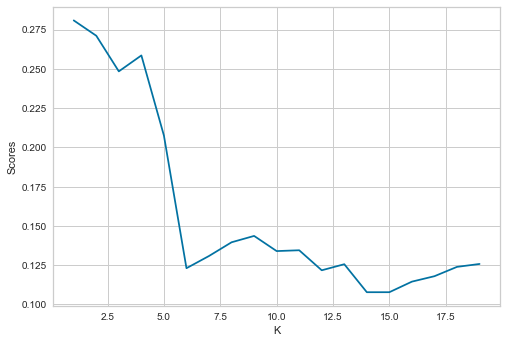

In [94]:
"I plotted it like this. X label is n_clusters value, y label is score. The best score was, when k is 2"
plt.xlabel("K")
plt.ylabel("Scores")
plt.plot(range(1,20),scores,"bx-")

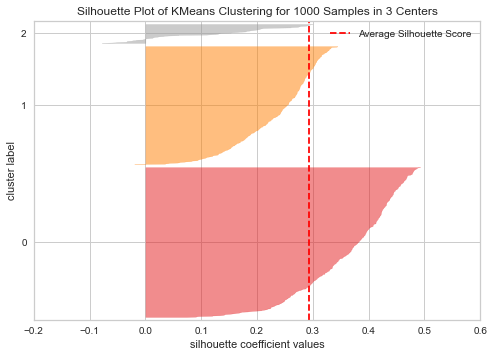

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [95]:
# Instantiate the clustering model and visualizer
"Also I visualize the table of silhoutte plot of K-means. Average score is about 2.95, i think it is enough good."
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(scaled_features) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [ ]:
"""
I think this data should be clustered by K-means clustring. Because its plot and silhoutte score were very good. 
I enjoyed while doing this assignment. I'm a little sad that this is our last assignment.
"""